## Team 2 - Deliverable 3

This folder contains graphs from our cleaned data using `example.py`

In [117]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Read csv file into dataframe
def process(path):
    df = pd.read_csv(path)
    df = df.drop(columns=['Unnamed: 0', 'party_initials', 'party_number', 'place_(zz_=_exterior)'])
    df["municipality_name"] = df["municipality_name"].str.title()
    df["party_name"] = df["party_name"].str.title()
    df["office"] = df["office"].str.title()
    return df

In [119]:
# Read all csv files into df
df1998 = process('election data/1998_Election_processed.csv')
df2002 = process('election data/2002_Election_processed.csv')
df2006 = process('election data/2006_Election_processed.csv')
df2010 = process('election data/2010_Election_processed.csv')
df2014 = process('election data/2014_Election_processed.csv')
df2018 = process('election data/2018_Election_processed.csv')

df = pd.concat([df1998, df2002, df2006, df2010, df2014, df2018], sort=False)
df = df.drop(columns=['unnamed:_4'])
df.to_csv("election data/sum_processed.csv")

In [120]:
df

,election_year,election_round,municipality_code,municipality_name,office,party_name,number_of_votes
0,1998,1,98787,Africa Do Sul,Presidente,Partido Social Democrata Cristao,1
1,1998,1,98787,Africa Do Sul,Presidente,Partido Trabalhista Do Brasil,3
2,1998,1,98787,Africa Do Sul,Presidente,Partido Dos Trabalhadores,10
3,1998,1,98787,Africa Do Sul,Presidente,Partido Da Social Democracia Brasileira,54
4,1998,1,11100,Alemanha,Presidente,Partido Trabalhista Nacional,1
...,...,...,...,...,...,...,...
1534,2018,1,11142,Argentina,Presidente,Podemos,46
1535,2018,1,11266,Estados Unidos,Presidente,Partido Patria Livre,4
1536,2018,1,11266,Estados Unidos,Presidente,Podemos,39
1537,2018,1,11282,Franca,Presidente,Podemos,30


In [121]:
# Function to graph votes for any party
def graphPartyVotes(df, party):
    x = sum_party_votes.Year.values
    oldList = sum_party_votes[party].values
    y =[]
    for i in range(len(oldList) - 1, -1, -1):
        votes = oldList[i]
        if np.isnan(votes) == False:
            y.insert(0,votes)
        else:
            x = np.delete(x, i)

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, y, 'o')
    plt.plot(x, m*x + b)
    plt.xticks(x, x)
    plt.ylim(0, 150000)
    plt.xlabel("Year")
    plt.ylabel("Votes")
    plt.title("Votes for " + party)
    plt.show()

In [122]:
# Given df return list of years and votes for each party in that year
def partyVotingPattern(df, years, parties):
    voting = []
    for year in years:
        rows = []
        for party in parties:
            partyDF = df.loc[df['party_name'] == party]
            partyDF = partyDF.loc[partyDF['election_year'] == year]
            votes = partyDF['number_of_votes'].sum()
            rows.append([party, votes])
        
        voting.append(rows)

    return voting

# Given df return list of years and votes for each municipality in that year
def municipalityVotingPattern(df, years, municipalities):
    voting = []
    for year in years:
        rows = []
        for municipality in municipalities:
            partyDF = df.loc[df['municipality_name'] == municipality]
            partyDF = partyDF.loc[partyDF['election_year'] == year]
            votes = partyDF['number_of_votes'].sum()
            rows.append([municipality, votes])
        
        voting.append(rows)

    return voting

# Given df return list of years and votes for each municipality in that year
def municipalityPartyVotingPattern(df, years, parties, municipalities):
    voting = []
    for year in years:
        for municipality in municipalities:
            for party in parties:
                partyDF = df.loc[df['municipality_name'] == municipality]
                partyDF = partyDF.loc[partyDF['election_year'] == year]
                partyDF = partyDF.loc[partyDF['party_name'] == party]
                vote_sum = partyDF['number_of_votes'].sum()
                row = [year, municipality, party, vote_sum]
                voting.append(row)
    
    df = pd.DataFrame(voting, columns = ['year', 'municipality_name', 'party_name', 'number_of_votes'])
    
    return df

years = list(set(df['election_year']))
years.sort()
parties = list(set(df['party_name']))
party_data = partyVotingPattern(df, years, parties)

municipalities = list(set(df['municipality_name']))
municipality_data = municipalityVotingPattern(df, years, municipalities)

municipality_party_data = municipalityPartyVotingPattern(df, years, parties, municipalities)

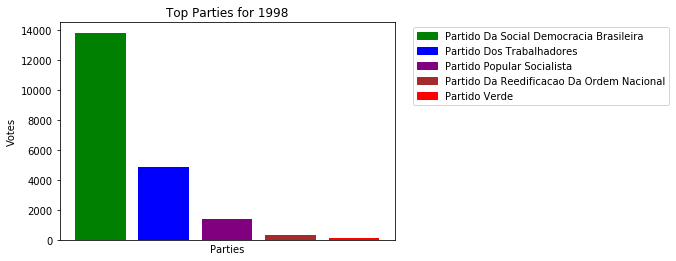

['Partido Da Social Democracia Brasileira', 'Partido Dos Trabalhadores', 'Partido Popular Socialista', 'Partido Da Reedificacao Da Ordem Nacional', 'Partido Verde']


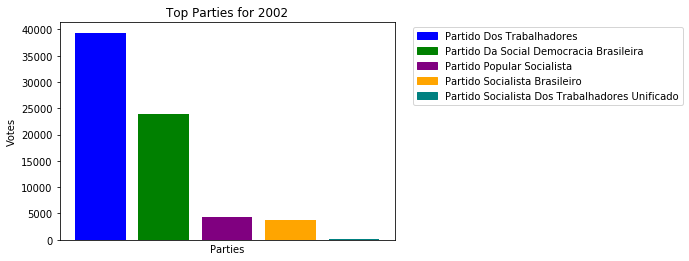

['Partido Dos Trabalhadores', 'Partido Da Social Democracia Brasileira', 'Partido Popular Socialista', 'Partido Socialista Brasileiro', 'Partido Socialista Dos Trabalhadores Unificado']


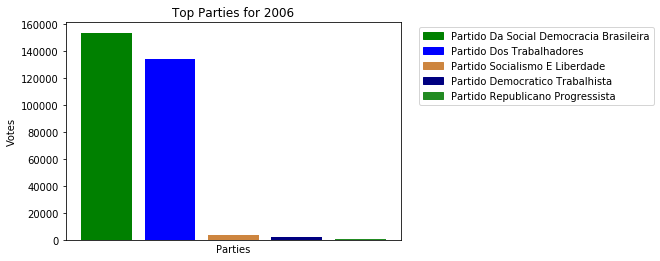

['Partido Da Social Democracia Brasileira', 'Partido Dos Trabalhadores', 'Partido Socialismo E Liberdade', 'Partido Democratico Trabalhista', 'Partido Republicano Progressista']


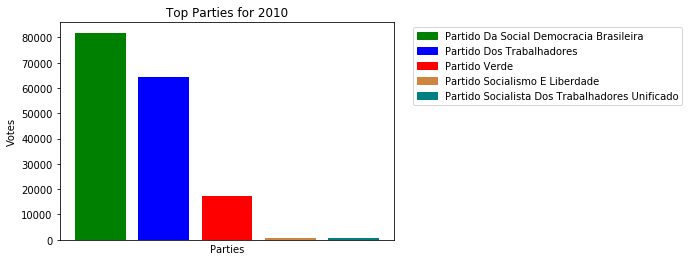

['Partido Da Social Democracia Brasileira', 'Partido Dos Trabalhadores', 'Partido Verde', 'Partido Socialismo E Liberdade', 'Partido Socialista Dos Trabalhadores Unificado']


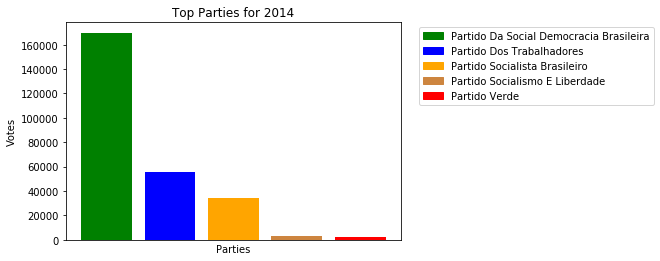

['Partido Da Social Democracia Brasileira', 'Partido Dos Trabalhadores', 'Partido Socialista Brasileiro', 'Partido Socialismo E Liberdade', 'Partido Verde']


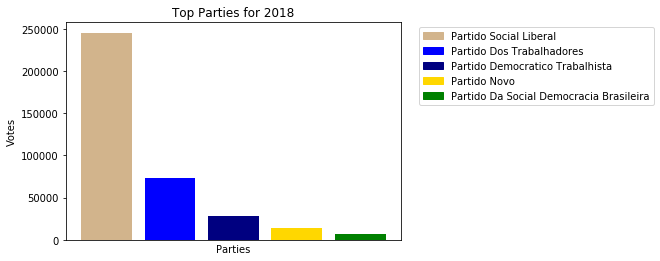

['Partido Social Liberal', 'Partido Dos Trabalhadores', 'Partido Democratico Trabalhista', 'Partido Novo', 'Partido Da Social Democracia Brasileira']


In [127]:
# Graph top parties for each year
def graphPartyVotes(party_data, top, years, parties, year):
    index = years.index(year)
    data = party_data[index]
    
    top_parties = []
    top_votes = []
    for value in data:
        if (len(top_parties) < top):
            top_parties.append(value[0])
            top_votes.append(value[1])
        else:
            top_parties.append(value[0])
            top_votes.append(value[1])
            zipped_lists = zip(top_votes, top_parties)
            sorted_zipped_lists = sorted(zipped_lists, reverse=True)
            top_parties = [element for _, element in sorted_zipped_lists]
            top_votes = [element for element, _ in sorted_zipped_lists]
            top_parties.pop()
            top_votes.pop()
            
    my_dict = {'Partido Da Social Democracia Brasileira' : 'green',
              'Partido Dos Trabalhadores' : 'blue', 'Partido Novo' : 'gold',
              'Partido Socialista Brasileiro' : 'orange', 'Rede Sustentabilidade' : 'orange',
              'Podemos' : 'red', 'Partido Socialista Dos Trabalhadores Unificado' : 'teal',
              'Partido Popular Socialista' : 'purple', 'Partido Da Reedificacao Da Ordem Nacional' : 'brown',
              'Partido Socialismo E Liberdade' : 'peru', 'Partido Verde' : 'red',
              'Partido Republicano Progressista' : 'forestgreen', 'Partido Social Liberal' : 'tan',
              'Partido Democratico Trabalhista' : 'navy'}
    
    colors = []
    for party in top_parties:
        colors.append(my_dict[party])
    
    plt.bar(top_parties, top_votes, color=colors)
    plt.xlabel("Parties")
    plt.xticks([], [])
    plt.ylabel("Votes")
    plt.title("Top Parties for " + str(year))
    handles = [plt.Rectangle((0,0),1,1, color=colors[top_parties.index(label)]) for label in top_parties]
    plt.legend(handles, top_parties, bbox_to_anchor=(1.04,1), loc='upper left')
    plt.show()
    print(top_parties)

for year in years:
    graphPartyVotes(party_data, 5, years, parties, year)

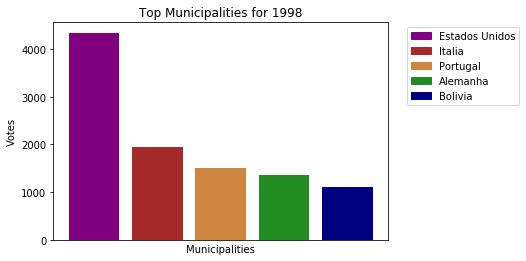

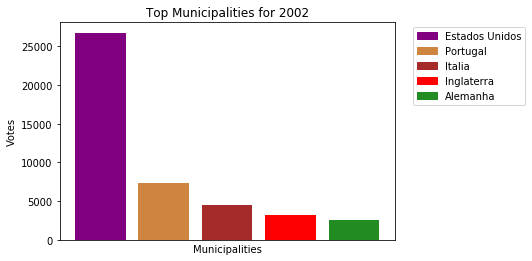

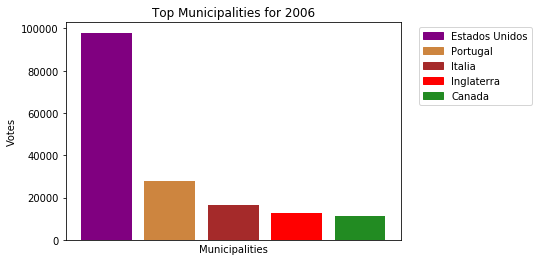

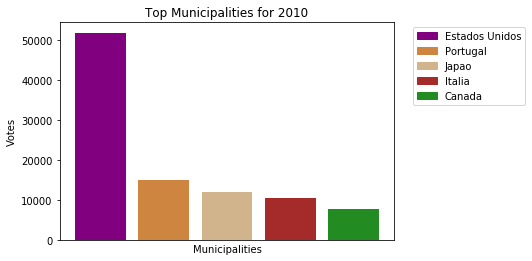

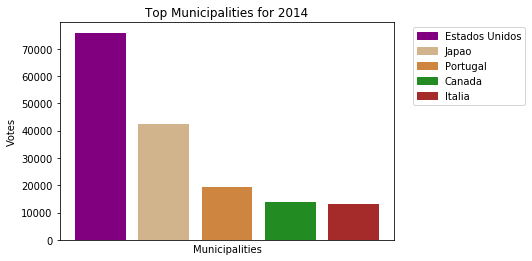

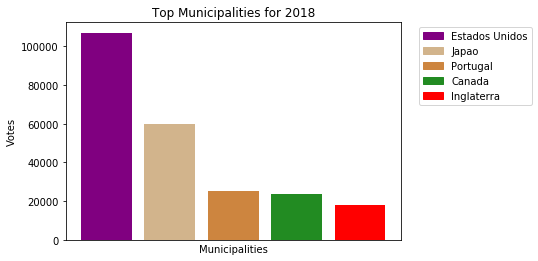

In [124]:
# Graph top municipalities for each year
def graphPartyVotes2(municipality_data, top, years, parties, year):
    index = years.index(year)
    data = municipality_data[index]
    
    top_municipalities = []
    top_votes = []
    for value in data:
        if (len(top_municipalities) < top):
            top_municipalities.append(value[0])
            top_votes.append(value[1])
        else:
            top_municipalities.append(value[0])
            top_votes.append(value[1])
            zipped_lists = zip(top_votes, top_municipalities)
            sorted_zipped_lists = sorted(zipped_lists, reverse=True)
            top_municipalities = [element for _, element in sorted_zipped_lists]
            top_votes = [element for element, _ in sorted_zipped_lists]
            top_municipalities.pop()
            top_votes.pop()
            
    my_dict = {'Estados Unidos' : 'purple', 'Italia' : 'brown',
              'Portugal' : 'peru', 'Alemanha' : 'forestgreen',
              'Bolivia' : 'navy', 'Inglaterra' : 'red',
              'Canada' : 'forestgreen', 'Japao' : 'tan'}
    colors = []
    for municipality in top_municipalities:
        colors.append(my_dict[municipality])   
    plt.bar(top_municipalities, top_votes, color=colors)
    plt.xlabel("Municipalities")
    plt.xticks([], [])
    plt.ylabel("Votes")
    plt.title("Top Municipalities for " + str(year))
    handles = [plt.Rectangle((0,0),1,1, color=colors[top_municipalities.index(label)]) for label in top_municipalities]
    plt.legend(handles, top_municipalities, bbox_to_anchor=(1.04,1), loc='upper left')
    plt.show()

for year in years:
    graphPartyVotes2(municipality_data, 5, years, municipalities, year)

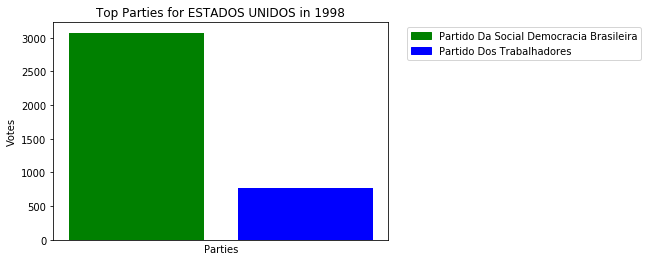

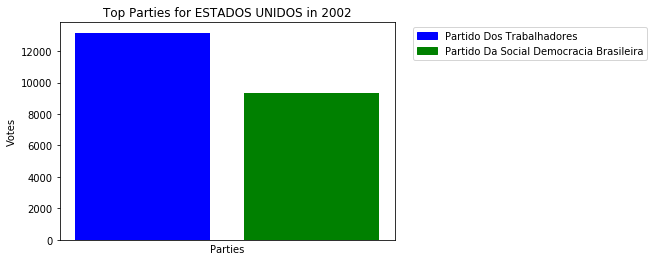

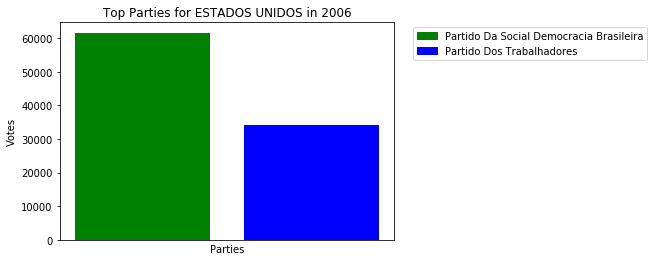

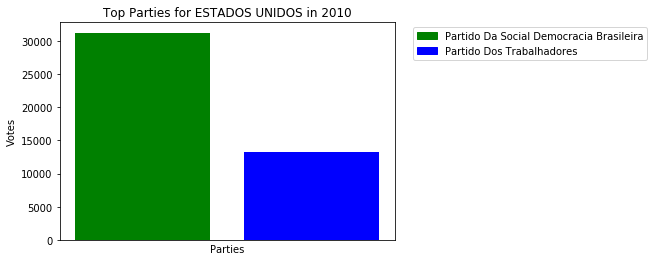

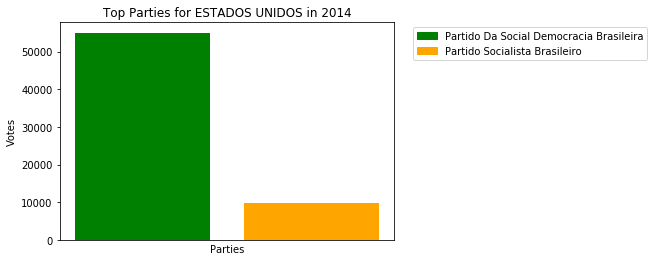

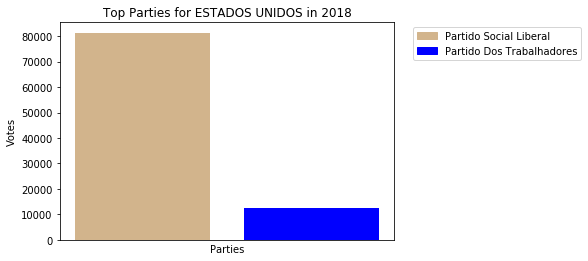

In [125]:
# Graph top parties for each top country
def graphPartyVotes3(municipality_party_data, top, years, parties, year):
    data = municipality_party_data.loc[municipality_party_data['municipality_name'] == top]
    data = data.loc[data['year'] == year]
    
    top_parties = []
    top_votes = []
    for party in parties:
        partyData = data.loc[data['party_name'] == party]
        vote_sum = partyData['number_of_votes'].sum()
        top_parties.append(party)
        top_votes.append(vote_sum)
        if len(top_parties) > 2:
            zipped_lists = zip(top_votes, top_parties)
            sorted_zipped_lists = sorted(zipped_lists, reverse=True)
            top_parties = [element for _, element in sorted_zipped_lists]
            top_votes = [element for element, _ in sorted_zipped_lists]
            top_parties.pop()
            top_votes.pop()
            
    my_dict = {'Partido Da Social Democracia Brasileira' : 'green',
              'Partido Dos Trabalhadores' : 'blue', 'Partido Novo' : 'gold',
              'Partido Socialista Brasileiro' : 'orange', 'Rede Sustentabilidade' : 'orange',
              'Podemos' : 'red', 'Partido Socialista Dos Trabalhadores Unificado' : 'teal',
              'Partido Popular Socialista' : 'purple', 'Partido Da Reedificacao Da Ordem Nacional' : 'brown',
              'Partido Socialismo E Liberdade' : 'peru', 'Partido Verde' : 'red',
              'Partido Republicano Progressista' : 'forestgreen', 'Partido Social Liberal' : 'tan',
              'Partido Democratico Trabalhista' : 'navy'}
    
    colors = []
    for party in top_parties:
        colors.append(my_dict[party])
    plt.bar(top_parties, top_votes, color=colors)
    plt.xlabel("Parties")
    plt.xticks([], [])
    plt.ylabel("Votes")
    plt.title("Top Parties for ESTADOS UNIDOS in " + str(year))
    handles = [plt.Rectangle((0,0),1,1, color=colors[top_parties.index(label)]) for label in top_parties]
    plt.legend(handles, top_parties, bbox_to_anchor=(1.04,1), loc='upper left')
    plt.show()

for year in years:
    graphPartyVotes3(municipality_party_data, 'Estados Unidos', years, parties, year)